In [112]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [82]:
def readdata():
    emission_mat = []
    for line in open("hw7_emissionMatrix.txt").readlines():
        emission_mat.append([log(float(x)) for x in line.rstrip().split("\t")])
    
    transition_mat = []
    for line in open("hw7_transitionMatrix.txt").readlines():
        transition_mat.append([log(float(x)) for x in line.rstrip().split(" ")])
        
    initialstates = []
    for line in open("hw7_initialStateDistribution.txt").readlines():
        initialstates.append(float(line.rstrip()))
        
    observations = []
    for line in open("hw7_observations.txt").readlines():
        observations = [int(x) for x in line.rstrip().split(" ")]
        
    return (np.array(emission_mat), np.array(transition_mat), 
            np.array(initialstates), np.array(observations))

emission_mat, transition_mat, initialstates, observations = readdata()

In [83]:
def findmaxprob(columnvals, j):
    #print(len(columnvals))
    #print(max([x*transition_mat[i][j] for i,x in enumerate(list(columnvals))]))
    return max([x + transition_mat[i][j] for i,x in enumerate(list(columnvals))])

def runviterbi():
    M = np.zeros(shape=(len(initialstates), len(observations)))
    for i in range(len(observations)):
        for j in range(len(initialstates)):
            if i == 0:
                #print(log(emission_mat[j][observations[i]]) + log(initialstates[j]))
                M[j][i] = emission_mat[j][observations[i]] + log(initialstates[j])
            else:
                #print(i)
                M[j][i] = emission_mat[j][observations[i]] + findmaxprob(M[:,i-1], j)
    return M
    
M = runviterbi()

In [115]:
def backtrack():
    message = []
    prev_state = np.argmax(M[:,239999])
    message.append(prev_state)
    for i in range(239998, -1, -1):
       prev_state = np.argmax(transition_mat[:,prev_state] + M[:,i])
       message.append(prev_state)
    message.reverse()
    return message

message = backtrack()

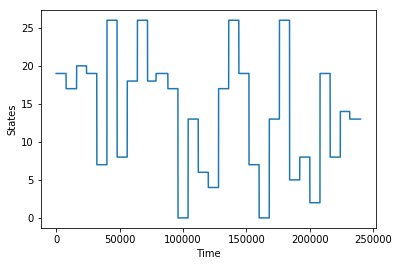

In [122]:
plt.plot(message)
plt.xlabel("Time")
plt.ylabel("States")
plt.show()

In [120]:
sentence = ""
for i in range(len(message)):
    if(message[i] != message[i-1]):
        if int(message[i]) == 26:
            sentence += " "
        else:
            sentence += chr(ord('a') + int(message[i]))

In [121]:
sentence

'truth is stranger than fiction'